# Name: Saurabh Mittal
# Task3: #6 Prediction Using Decision Tree Algorithm

# Step1: Importing Libraries

In [48]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix

# Step2: Reading the dataset

In [35]:
df=pd.read_csv("Iris .csv")
df=df.set_index("Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# Step3: Input Data Visualization

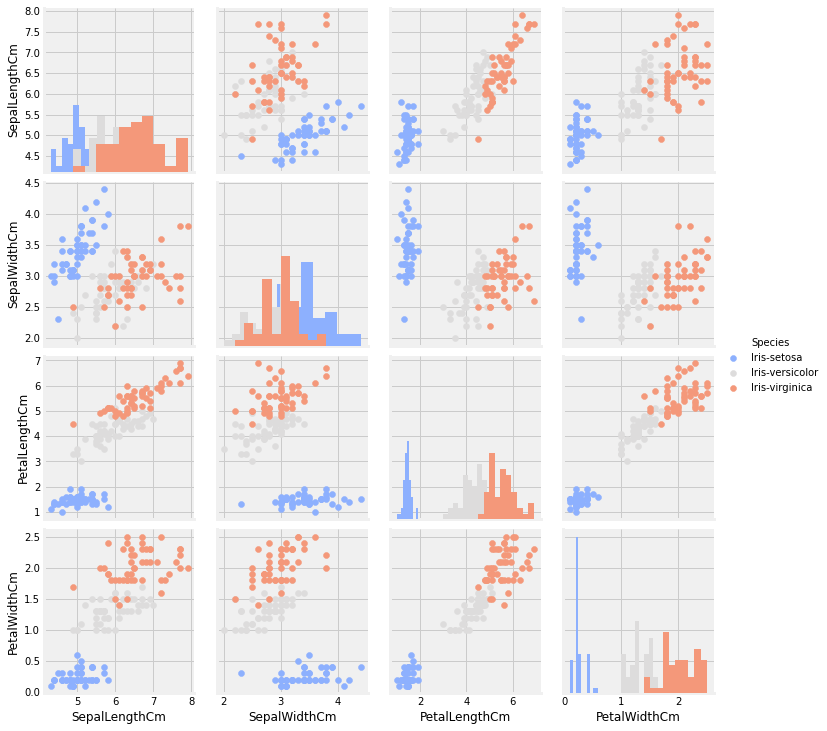

In [14]:
f=sns.PairGrid(df,hue="Species",palette="coolwarm")
f=f.map_diag(plt.hist)
f=f.map_offdiag(plt.scatter)
f=f.add_legend()

# Step4: Preparing the data for the model

In [16]:
y=df['Species']
x=df.drop(columns='Species')

In [17]:
x.shape,y.shape

((150, 4), (150,))

# Step5: Splitting the dataset into training and testing data

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Step6: Model Training

In [49]:
model=DecisionTreeClassifier(max_depth=5,criterion="entropy",splitter="random",min_samples_split=50)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=50,
                       splitter='random')

# Step7: Visualizing the decision tree

[Text(250.55999999999997, 380.52, 'X[2] <= 1.962\nentropy = 1.584\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(125.27999999999999, 271.8, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(375.84, 271.8, 'X[3] <= 1.293\nentropy = 0.999\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(250.55999999999997, 163.07999999999998, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12, 0]'),
 Text(501.11999999999995, 163.07999999999998, 'X[3] <= 1.817\nentropy = 0.964\nsamples = 67\nvalue = [0, 26, 41]'),
 Text(375.84, 54.360000000000014, 'entropy = 0.918\nsamples = 39\nvalue = [0, 26, 13]'),
 Text(626.4, 54.360000000000014, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

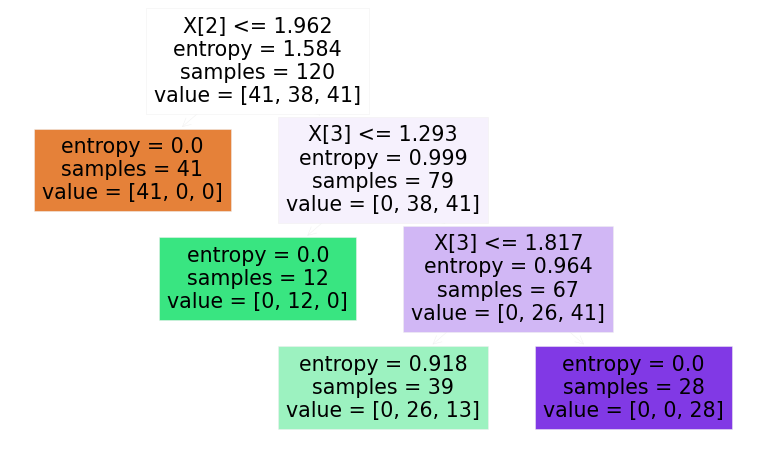

In [52]:
plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True)

# Step8: Prediction

In [50]:
prediction=model.predict(x_test)
prediction

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa'], dtype=object)

In [23]:
df1=pd.DataFrame({'True Values':y_test,'Predicted Values':prediction})
df1.head()

,True Values,Predicted Values
Id,,
90,Iris-versicolor,Iris-versicolor
77,Iris-versicolor,Iris-virginica
20,Iris-setosa,Iris-setosa
83,Iris-versicolor,Iris-versicolor
46,Iris-setosa,Iris-setosa


In [29]:
print("Train Score:", model.score(x_train,y_train))
print("Test Score:", model.score(x_test,y_test))

Train Score: 0.9416666666666667
Test Score: 0.9


In [46]:
df1['True Values'].value_counts()

Iris-versicolor    12
Iris-setosa         9
Iris-virginica      9
Name: True Values, dtype: int64

In [33]:
df1['Predicted Values'].value_counts()

Iris-virginica     11
Iris-setosa        10
Iris-versicolor     9
Name: Predicted Values, dtype: int64

# Step9: Comparing Actual VS Predicted Values using Confusion Matrix

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x576 with 0 Axes>

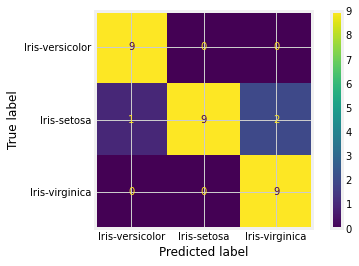

In [44]:
plt.figure(figsize=(12,8))
class_names=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
plot_confusion_matrix(model,x_test,y_test,display_labels=class_names)
plt.show